## RATINGS PREDICTION

#### Problem statement

We have a client who has a website where people write different reviews for technical products. Now they are adding a new feature to their website i.e. The reviewer will have to add stars(rating) as well with the review. The rating is out 5 stars and it only has 5 options available 1 star, 2 stars, 3 stars, 4 stars, 5 stars. Now they want to predict ratings for the reviews which were written in the past and they don’t have a rating. So, we have to build an application which can predict the rating by seeing the review.

After collecting the data, we need to build a machine learning model. Before model building, we will do all data preprocessing steps involving NLP.

## Importing Libraries

In [1]:
#importing required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#load the dataset which has 20000+ Ratings and reviews of different amazon products

rat=pd.read_csv('20000 Ratings and Reviews final.csv',encoding='latin-1')

In [3]:
rat.head()

Unnamed: 0                               Brand  \
0           0  New Apple iPhone 11 (64GB) - Green   
1           1  New Apple iPhone 11 (64GB) - Green   
2           2  New Apple iPhone 11 (64GB) - Green   
3           3  New Apple iPhone 11 (64GB) - Green   
4           4  New Apple iPhone 11 (64GB) - Green   

                                             Reviews             Ratings  
0  Please do not buy expensive product like iphon...  1.0 out of 5 stars  
1  Bought the mobile from appario retail ltd. Mob...  1.0 out of 5 stars  
2  Awesome Phone. Nice upgrade from iPhone 6s to ...  5.0 out of 5 stars  
3  My Phone is Producing Too Much Heat Even Didnâ...  1.0 out of 5 stars  
4  The iPhone design is good and the camera quali...  5.0 out of 5 stars

In [110]:
#we find the ratings is of big string , we can convert it into single numeric value by splitting 
rat["Ratings"]=rat["Ratings"].str.split()

AttributeError: Can only use .str accessor with string values!

In [5]:
rat["Ratings"]=rat["Ratings"].str.get(0)

In [6]:
#Now we can see the perfect data available for rating
rat.head()

Unnamed: 0                               Brand  \
0           0  New Apple iPhone 11 (64GB) - Green   
1           1  New Apple iPhone 11 (64GB) - Green   
2           2  New Apple iPhone 11 (64GB) - Green   
3           3  New Apple iPhone 11 (64GB) - Green   
4           4  New Apple iPhone 11 (64GB) - Green   

                                             Reviews Ratings  
0  Please do not buy expensive product like iphon...     1.0  
1  Bought the mobile from appario retail ltd. Mob...     1.0  
2  Awesome Phone. Nice upgrade from iPhone 6s to ...     5.0  
3  My Phone is Producing Too Much Heat Even Didnâ...     1.0  
4  The iPhone design is good and the camera quali...     5.0

In [7]:
#let us see how the data varies in term of counts

rat["Ratings"].value_counts()

5.0    7984
1.0    4482
3.0    3606
4.0    3129
2.0    1266
Name: Ratings, dtype: int64

In [8]:
rat

Unnamed: 0                                              Brand  \
0               0                 New Apple iPhone 11 (64GB) - Green   
1               1                 New Apple iPhone 11 (64GB) - Green   
2               2                 New Apple iPhone 11 (64GB) - Green   
3               3                 New Apple iPhone 11 (64GB) - Green   
4               4                 New Apple iPhone 11 (64GB) - Green   
...           ...                                                ...   
20462       20462  Whirlpool 245 L 4 Star Inverter Direct-Cool Si...   
20463       20463  Whirlpool 245 L 4 Star Inverter Direct-Cool Si...   
20464       20464  Whirlpool 245 L 4 Star Inverter Direct-Cool Si...   
20465       20465  Whirlpool 245 L 4 Star Inverter Direct-Cool Si...   
20466       20466  Whirlpool 245 L 4 Star Inverter Direct-Cool Si...   

                                                 Reviews Ratings  
0      Please do not buy expensive product like iphon...     1.0  
1      Bought the mobile from appario retail ltd. Mob...     1.0  
2      Awesome Phone. Nice upgrade from iPhone 6s to ...     5.0  
3      My Phone is Producing Too Much Heat Even Didnâ...     1.0  
4      The iPhone design is good and the camera quali...     5.0  
...                                                  ...     ...  
20462  Storage is super. Getting food basket tooAuto ...     3.0  
20463  Lot of water drops on Tray just below freezer....     1.0  
20464                                           Not Good     5.0  
20465                                      Great product     5.0  
20466                                       Good product     3.0  

[20467 rows x 4 columns]

In [9]:
# we find that unnamed and Brand are of no use. we can drop it.

rat.drop(columns=['Unnamed: 0','Brand'],axis=0,inplace=True)

In [10]:
rat

Reviews Ratings
0      Please do not buy expensive product like iphon...     1.0
1      Bought the mobile from appario retail ltd. Mob...     1.0
2      Awesome Phone. Nice upgrade from iPhone 6s to ...     5.0
3      My Phone is Producing Too Much Heat Even Didnâ...     1.0
4      The iPhone design is good and the camera quali...     5.0
...                                                  ...     ...
20462  Storage is super. Getting food basket tooAuto ...     3.0
20463  Lot of water drops on Tray just below freezer....     1.0
20464                                           Not Good     5.0
20465                                      Great product     5.0
20466                                       Good product     3.0

[20467 rows x 2 columns]

#### we have 20467 rows and 2 columns

In [11]:
print('Shape => ',rat.shape)

Shape =>  (20467, 2)


In [12]:
print('Each rating counts \n',rat.Ratings.value_counts())

Each rating counts 
 5.0    7984
1.0    4482
3.0    3606
4.0    3129
2.0    1266
Name: Ratings, dtype: int64


In [13]:
# The datatypes of column
rat.dtypes

Reviews    object
Ratings    object
dtype: object

In [14]:
#Since it is of object datatype. we have to change it into float and then int
rat["Ratings"]=rat["Ratings"].astype(float)

In [15]:
rat["Ratings"]=rat["Ratings"].astype(int)

In [16]:
#The datatype is perfect now
rat

Reviews  Ratings
0      Please do not buy expensive product like iphon...        1
1      Bought the mobile from appario retail ltd. Mob...        1
2      Awesome Phone. Nice upgrade from iPhone 6s to ...        5
3      My Phone is Producing Too Much Heat Even Didnâ...        1
4      The iPhone design is good and the camera quali...        5
...                                                  ...      ...
20462  Storage is super. Getting food basket tooAuto ...        3
20463  Lot of water drops on Tray just below freezer....        1
20464                                           Not Good        5
20465                                      Great product        5
20466                                       Good product        3

[20467 rows x 2 columns]

In [17]:
#The ratio of ratings present in dataset

print ('5 star ratio = ',round(len(rat[rat['Ratings']==5])/len(rat.Ratings),2)*100,'%')
print("\n")
print ('4 star ratio = ',round(len(rat[rat['Ratings']==4])/len(rat.Ratings),2)*100,'%')
print("\n")
print ('3 star ratio = ',round(len(rat[rat['Ratings']==3])/len(rat.Ratings),2)*100,'%')
print("\n")
print ('2 star ratio = ',round(len(rat[rat['Ratings']==2])/len(rat.Ratings),2)*100,'%')
print("\n")
print ('1 star ratio = ',round(len(rat[rat['Ratings']==1])/len(rat.Ratings),2)*100,'%')


5 star ratio =  39.0 %


4 star ratio =  15.0 %


3 star ratio =  18.0 %


2 star ratio =  6.0 %


1 star ratio =  22.0 %


In [18]:
#We know that there will be columns with no values , we can drop it
rat.dropna(inplace=True)

In [19]:
#New column for length of reviews

rat['length']=rat.Reviews.str.len()
rat.head(5)

Reviews  Ratings  length
0  Please do not buy expensive product like iphon...        1     693
1  Bought the mobile from appario retail ltd. Mob...        1     790
2  Awesome Phone. Nice upgrade from iPhone 6s to ...        5      83
3  My Phone is Producing Too Much Heat Even Didnâ...        1     406
4  The iPhone design is good and the camera quali...        5     926

In [20]:
rat['length'].dtype

dtype('int64')

In [21]:
#convert all Reviews to lower case

rat['Reviews']=rat['Reviews'].str.lower()

In [22]:
rat

Reviews  Ratings  length
0      please do not buy expensive product like iphon...        1     693
1      bought the mobile from appario retail ltd. mob...        1     790
2      awesome phone. nice upgrade from iphone 6s to ...        5      83
3      my phone is producing too much heat even didnâ...        1     406
4      the iphone design is good and the camera quali...        5     926
...                                                  ...      ...     ...
20462  storage is super. getting food basket tooauto ...        3     124
20463  lot of water drops on tray just below freezer....        1     106
20464                                           not good        5       8
20465                                      great product        5      13
20466                                       good product        3      12

[19593 rows x 3 columns]

In [23]:
#! pip install git+https://github.com/laxmimerit/preprocess_kgptalkie.git --upgrade --force-reinstall

  Cloning https://github.com/laxmimerit/preprocess_kgptalkie.git to c:\users\jijin\appdata\local\temp\pip-req-build-geytjz7d
  Created wheel for preprocess-kgptalkie: filename=preprocess_kgptalkie-0.1.3-py3-none-any.whl size=7677 sha256=75c391f55605e48c4151a4080c0c3c999e41672bd5e7384a4c811535672939d7
  Stored in directory: C:\Users\jijin\AppData\Local\Temp\pip-ephem-wheel-cache-0vj55did\wheels\fd\71\47\e04f208ad659a295ccb69022e14de7d20ccc6fc30a5a935f09
Successfully built preprocess-kgptalkie


  Running command git clone -q https://github.com/laxmimerit/preprocess_kgptalkie.git 'C:\Users\jijin\AppData\Local\Temp\pip-req-build-geytjz7d'


In [26]:
#! pip install spacy==2.2.3
#! python -m spacy download en_core_web_sm
#! pip install beautifulsoup4==4.9.1
#! pip install textblob==0.15.3

  Created wheel for en-core-web-sm: filename=en_core_web_sm-2.2.5-py3-none-any.whl size=12011738 sha256=7e077d6208665981ed93b96ed82cc6a99e7583d0ee50258307861037aa82815a
  Stored in directory: C:\Users\jijin\AppData\Local\Temp\pip-ephem-wheel-cache-t0yu0ugy\wheels\77\b4\c8\395804b9a2b6864aaff3623d7b709680acc3d04f47c8162ee6
Successfully built en-core-web-sm
[+] Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.9.3
    Uninstalling beautifulsoup4-4.9.3:
      Successfully uninstalled beautifulsoup4-4.9.3


### Data Cleaning

In [27]:
# let us the import the required library and clean the text for further usage in machine learning

import preprocess_kgptalkie as ps
import re

In [28]:
#User defined function

def get_clean(x):
    x = str(x).lower().replace('\\', '').replace('_', ' ')
    x = ps.cont_exp(x)
    x = ps.remove_emails(x)
    x = ps.remove_urls(x)
    x = ps.remove_html_tags(x)
    x = ps.remove_rt(x)
    x = ps.remove_accented_chars(x)
    x = ps.remove_special_chars(x)
    x = re.sub("(.)\\1{2,}", "\\1", x)
    return x

In [29]:
#cleaning data
rat['Reviews']=rat['Reviews'].apply(lambda x: get_clean(x))

In [32]:
rat.sample(5)

Reviews  Ratings  length
20260  good product and stylishinterior looks wide an...        1     196
18215  awesome watch very good quality screen spo2 he...        5     299
5319   in two months it corrupted 2 memory cards user...        5     136
927    sound problem and display problem and also on ...        1      68
1898   the best among the budget flagship smartphones...        5     336

In [33]:
rat.head()

Reviews  Ratings  length
0  please do not buy expensive product like iphon...        1     693
1  bought the mobile from appario retail limited ...        1     790
2  awesome phone nice upgrade from iphone 6s to i...        5      83
3  my phone is producing too much heat even didna...        1     406
4  the iphone design is good and the camera quali...        5     926

In [111]:
#we can try using regular expression method also to make sure the data is cleaned

# Regular Expression

we have to remove regular expression and punctuations

In [46]:
#Replace email address with email
rat['Reviews']=rat['Reviews'].str.replace(r'^.+@[^\.].*\.[a-z]{2,}$','email address')

In [47]:
rat.head()

Reviews  Ratings  length
0  please do not buy expensive product like iphon...        1     693
1  bought the mobile from appario retail ltd. mob...        1     790
2  awesome phone. nice upgrade from iphone 6s to ...        5      83
3  my phone is producing too much heat even didnâ...        1     406
4  the iphone design is good and the camera quali...        5     926

In [48]:
#replace URLS with webaddress

rat['Reviews']=rat['Reviews'].str.replace(r'^https\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$','webaddress')

In [49]:
rat.head()

Reviews  Ratings  length
0  please do not buy expensive product like iphon...        1     693
1  bought the mobile from appario retail ltd. mob...        1     790
2  awesome phone. nice upgrade from iphone 6s to ...        5      83
3  my phone is producing too much heat even didnâ...        1     406
4  the iphone design is good and the camera quali...        5     926

In [51]:
#replace money symbol with 'moneysymp' (£ Can be typed using windows+. key) 

rat['Reviews']=rat['Reviews'].str.replace(r'£|\$','rupees')

In [52]:
rat.head()

Reviews  Ratings  length
0  please do not buy expensive product like iphon...        1     693
1  bought the mobile from appario retail ltd. mob...        1     790
2  awesome phone. nice upgrade from iphone 6s to ...        5      83
3  my phone is producing too much heat even didnâ...        1     406
4  the iphone design is good and the camera quali...        5     926

In [53]:
#Replace 10 digit phone numbers (formats include paranthesis,spaces,no spaces,dashes) with phone number

rat['Reviews']=rat['Reviews'].str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$','phone number')

In [54]:
rat.head()

Reviews  Ratings  length
0  please do not buy expensive product like iphon...        1     693
1  bought the mobile from appario retail ltd. mob...        1     790
2  awesome phone. nice upgrade from iphone 6s to ...        5      83
3  my phone is producing too much heat even didnâ...        1     406
4  the iphone design is good and the camera quali...        5     926

In [55]:
#Replace numbers with number

rat['Reviews']=rat['Reviews'].str.replace(r'\d+(\.\d+)?','number')

In [56]:
#Remove punctuation

rat['Reviews']=rat['Reviews'].str.replace(r'[^\w\d\s]',' ')

In [57]:
#Replace whitespace between terms with a single space

rat['Reviews']=rat['Reviews'].str.replace(r'\s+',' ')

In [58]:
#Remove leading and twisting white space

rat['Reviews']=rat['Reviews'].str.replace(r'^\s+|\s+?$',' ')

In [59]:
rat.head()

Reviews  Ratings  length
0  please do not buy expensive product like iphon...        1     693
1  bought the mobile from appario retail ltd mobi...        1     790
2  awesome phone nice upgrade from iphone numbers...        5      83
3  my phone is producing too much heat even didnâ...        1     406
4  the iphone design is good and the camera quali...        5     926

In [34]:
#to remove 
import re 

def deEmojify(text):
    regrex_pattern = re.compile(pattern = "["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags = re.UNICODE)
    return regrex_pattern.sub(r'',text)

In [35]:
rat["Reviews"]=rat["Reviews"].apply(lambda x: deEmojify(x))

In [36]:
#Remove stopwords

import string
import nltk
from nltk.corpus import stopwords
stp=set(stopwords.words('english')+['u','ã','ur','4','2','im','dont','doin','ure','á','â','ä','å','de'])
rat['Reviews']=rat['Reviews'].apply(lambda x:' '.join(term for term in x.split() if term not in stp))

In [37]:
#New column (clean_length) after punctuations stopwords removal

rat['clean_length']=rat.Reviews.str.len()

In [38]:
rat

Reviews  Ratings  length  \
0      please buy expensive product like iphone amazo...        1     693   
1      bought mobile appario retail limited mobile he...        1     790   
2      awesome phone nice upgrade iphone 6s iphone 11...        5      83   
3      phone producing much heat even didnat put sim ...        1     406   
4      iphone design good camera quality awesome also...        5     926   
...                                                  ...      ...     ...   
20462  storage super getting food basket tooauto defr...        3     124   
20463  lot water drops tray freezer cant keep anythin...        1     106   
20464                                               good        5       8   
20465                                      great product        5      13   
20466                                       good product        3      12   

       clean_length  
0               461  
1               538  
2                67  
3               292  
4               622  
...             ...  
20462            97  
20463            76  
20464             4  
20465            13  
20466            12  

[19593 rows x 4 columns]

In [39]:
#Total length removal done

print('original length',rat.length.sum())
print('clean length',rat.clean_length.sum())

original length 8553456
clean length 5894678


##### Reviews Distribution Before cleaning

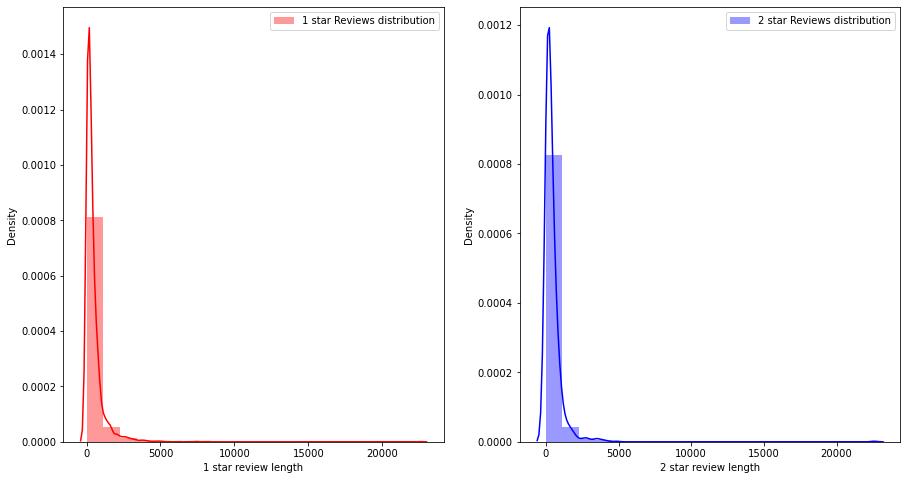

In [40]:
f,ax = plt.subplots(1,2,figsize=(15,8))
#1 star
sns.distplot(rat[rat['Ratings']==1]['length'],bins=20,ax=ax[0],label='1 star Reviews distribution',color='r')
ax[0].set_xlabel('1 star review length')
ax[0].legend()

#2 star
sns.distplot(rat[rat['Ratings']==2]['length'],bins=20,ax=ax[1],label='2 star Reviews distribution',color='b')
ax[1].set_xlabel('2 star review length')
ax[1].legend()


plt.show()

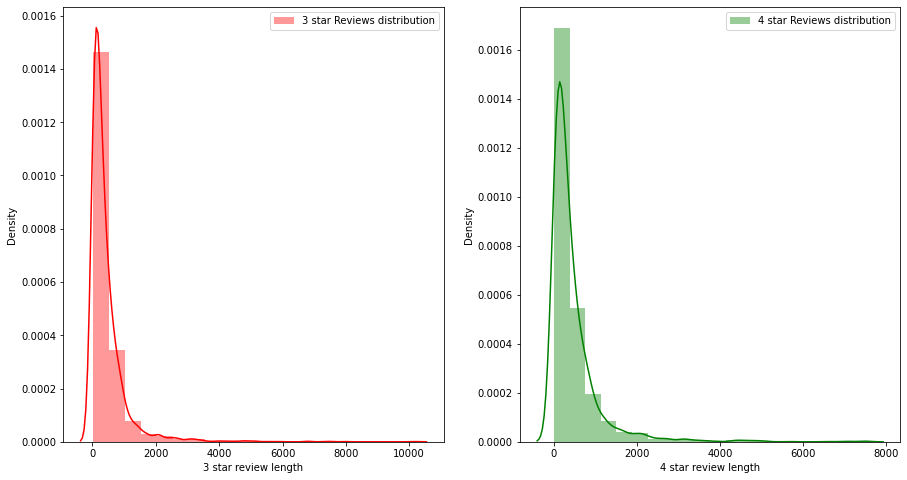

In [41]:
f,ax = plt.subplots(1,2,figsize=(15,8))
#3 star
sns.distplot(rat[rat['Ratings']==3]['length'],bins=20,ax=ax[0],label='3 star Reviews distribution',color='r')
ax[0].set_xlabel('3 star review length')
ax[0].legend()

#4 star
sns.distplot(rat[rat['Ratings']==4]['length'],bins=20,ax=ax[1],label='4 star Reviews distribution',color='g')
ax[1].set_xlabel('4 star review length')
ax[1].legend()

plt.show()

In [42]:
f,ax = plt.subplots(1,2,figsize=(15,8))


#5 star
sns.distplot(rat[rat['Ratings']==5]['length'],bins=20,ax=ax[0],label='5 star Reviews distribution',color='b')
ax[0].set_xlabel('5 star review length')
ax[0].legend()

plt.show()

##### Reviews Distribution After cleaning

In [43]:
f,ax = plt.subplots(1,2,figsize=(15,8))
#1 star
sns.distplot(rat[rat['Ratings']==1]['clean_length'],bins=20,ax=ax[0],label='1 star Reviews distribution',color='r')
ax[0].set_xlabel('1 star review length')
ax[0].legend()

#2 star
sns.distplot(rat[rat['Ratings']==2]['clean_length'],bins=20,ax=ax[1],label='2 star Reviews distribution',color='b')
ax[1].set_xlabel('2 star review length')
ax[1].legend()


plt.show()

In [44]:
f,ax = plt.subplots(1,2,figsize=(15,8))
#3 star
sns.distplot(rat[rat['Ratings']==3]['clean_length'],bins=20,ax=ax[0],label='3 star Reviews distribution',color='r')
ax[0].set_xlabel('3 star review length')
ax[0].legend()

#4 star
sns.distplot(rat[rat['Ratings']==4]['clean_length'],bins=20,ax=ax[1],label='4 star Reviews distribution',color='g')
ax[1].set_xlabel('4 star review length')
ax[1].legend()

plt.show()

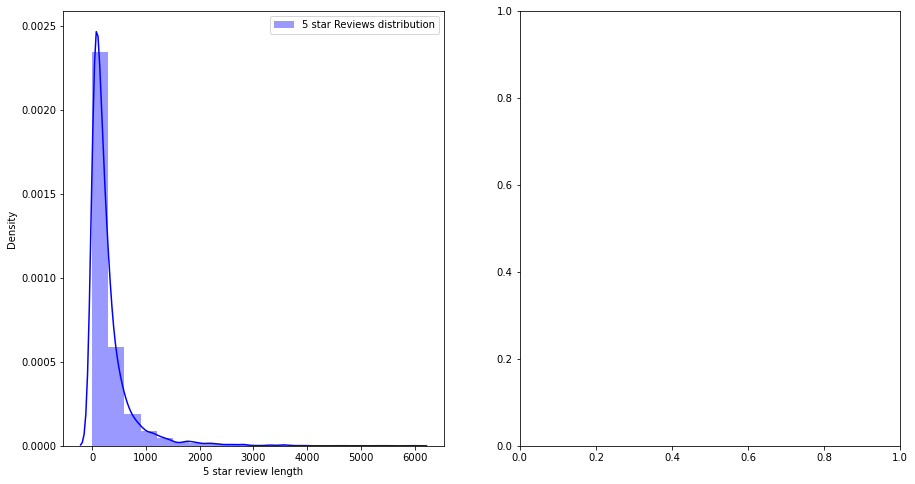

In [45]:
f,ax = plt.subplots(1,2,figsize=(15,8))


#5 star
sns.distplot(rat[rat['Ratings']==5]['clean_length'],bins=20,ax=ax[0],label='5 star Reviews distribution',color='b')
ax[0].set_xlabel('5 star review length')
ax[0].legend()

plt.show()

This is how the density of data available after cleaning

# Word cloud - Data visualization

Let us try word cloud to show us the important word corresponding each rating 

In [46]:
#importing lib 
from wordcloud import WordCloud #importing library

In [47]:
#defining word cloud for 5 star rating
fivestar=rat['Reviews'][rat['Ratings']==5]

fivestar_cloud=WordCloud(width=700,height=500,background_color="white",max_words=20).generate(' '.join(fivestar))

In [49]:
#Plotting figure

plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(fivestar_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

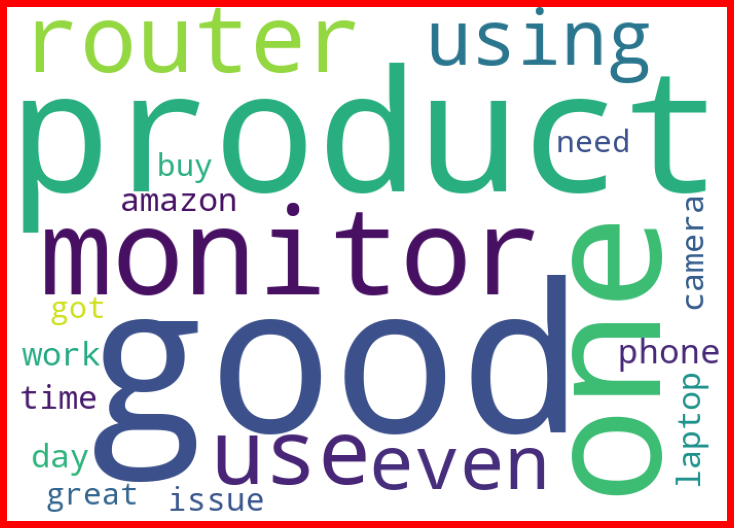

In [50]:
#similarily for 4 star 

star=rat['Reviews'][rat['Ratings']==4]

star_cloud=WordCloud(width=700,height=500,background_color="white",max_words=20).generate(' '.join(star))

plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(star_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [51]:
#similarily for 3 star 

star=rat['Reviews'][rat['Ratings']==3]

star_cloud=WordCloud(width=700,height=500,background_color="white",max_words=20).generate(' '.join(star))

plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(star_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

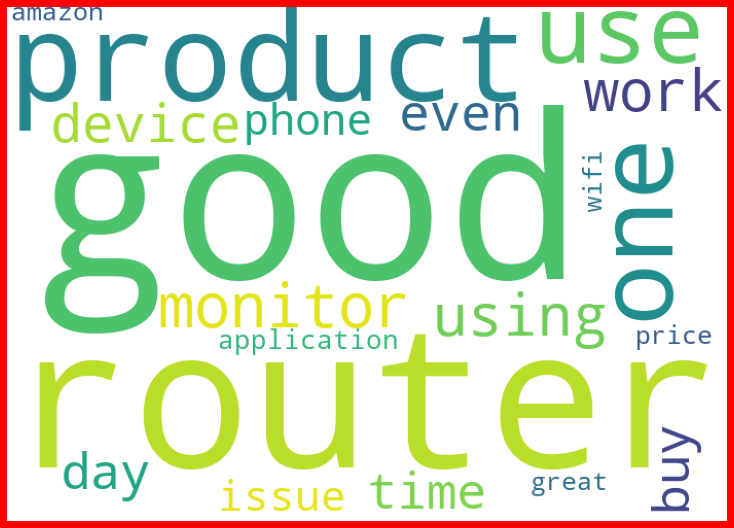

In [52]:
#similarily for 2 star 

star=rat['Reviews'][rat['Ratings']==2]

star_cloud=WordCloud(width=700,height=500,background_color="white",max_words=20).generate(' '.join(star))

plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(star_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [53]:
#similarily for 1 star 

star=rat['Reviews'][rat['Ratings']==1]

star_cloud=WordCloud(width=700,height=500,background_color="white",max_words=20).generate(' '.join(star))

plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(star_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [87]:
#MODEL BUILDING #required libraries

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.ensemble import RandomForestClassifier


In [88]:
#Changing text into vectors and algorithm initializing

tf_vec=TfidfVectorizer(max_features=20000,ngram_range=(1,5),analyzer='char')
naive=MultinomialNB(alpha=0.6)
SVC=LinearSVC()
rf=RandomForestClassifier(n_estimators=100)
features=tf_vec.fit_transform(rat['Reviews'])

In [89]:
#initializing X and y

X=features
y=rat['Ratings']

In [90]:
#Model algorithm 1
#Train and Test 
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
naive.fit(X_train,y_train)
y_pred=naive.predict(X_test)

In [91]:
#scoring #accuracy

print('Final Score => ',accuracy_score(y_test,y_pred))

Final Score =>  0.4069915794845624


In [92]:
# Let us see other  metrics

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.30      0.14      0.19       857
           2       0.11      0.00      0.01       262
           3       0.38      0.24      0.29       657
           4       0.22      0.03      0.06       566
           5       0.43      0.82      0.57      1577

    accuracy                           0.41      3919
   macro avg       0.29      0.25      0.22      3919
weighted avg       0.34      0.41      0.33      3919



In [93]:
print(confusion_matrix(y_test,y_pred))

[[ 123    3   50   18  663]
 [  34    1   31   15  181]
 [  45    2  156   17  437]
 [  62    2   50   19  433]
 [ 142    1  119   19 1296]]


In [94]:
#Model algorithm 2
#Train and Test  
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
SVC.fit(X_train,y_train)


LinearSVC()

In [95]:
y_pred=SVC.predict(X_test)

In [96]:
#scoring #accuracy

print('Final Score => ',accuracy_score(y_test,y_pred))

Final Score =>  0.3699923449859658


In [97]:
# Let us see other  metrics

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.27      0.23      0.25       857
           2       0.14      0.03      0.05       262
           3       0.37      0.33      0.35       657
           4       0.17      0.09      0.12       566
           5       0.44      0.62      0.51      1577

    accuracy                           0.37      3919
   macro avg       0.28      0.26      0.26      3919
weighted avg       0.33      0.37      0.34      3919



In [98]:
#Model algorithm 3
#Train and Test  
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
rf.fit(X_train,y_train)


RandomForestClassifier()

In [99]:
y_pred=rf.predict(X_test)

In [100]:
#scoring #accuracy

print('Final Score => ',accuracy_score(y_test,y_pred))

Final Score =>  0.3878540443990814


In [109]:
# Let us check with new set of data 

x="This product is really good, i like it"
x=get_clean(x)
vec=tf_vec.transform([x])
naive.predict(vec)

array([5])

Therefore it is giving 5 star rating for text given

Therefore model can predict Rating with 41% accuracy which is pretty low due to unbalanced data. It can be improved we can scrape equal number of data

# Thus, Model is created Succesfully